In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

df = pd.read_csv('covid.csv')
df.head()

,TipusCasData,RegioSanitariaCodi,RegioSanitariaDescripcio,EdatRang,SexeCodi,SexeDescripcio,TipusCasDescripcio,NumCasos
0,04/05/2021,7100,ALT PIRINEU I ARAN,30-39,0.0,Home,Positiu TAR,1
1,04/05/2021,7100,ALT PIRINEU I ARAN,0-9,0.0,Home,Positiu per Test Ràpid,1
2,04/05/2021,7100,ALT PIRINEU I ARAN,10-19,1.0,Dona,Positiu TAR,1
3,04/05/2021,7803,BARCELONA CIUTAT,50-59,1.0,Dona,Positiu TAR,3
4,04/05/2021,7803,BARCELONA CIUTAT,90+,0.0,Home,Positiu per ELISA,2


In [2]:
print(df.shape)

(108840, 8)


El dataset té 108840 files i 8 columnes.

In [3]:
print(df.columns)
print(df.info())

Index(['TipusCasData', 'RegioSanitariaCodi', 'RegioSanitariaDescripcio',
       'EdatRang', 'SexeCodi', 'SexeDescripcio', 'TipusCasDescripcio',
       'NumCasos'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108840 entries, 0 to 108839
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TipusCasData              108840 non-null  object 
 1   RegioSanitariaCodi        108840 non-null  int64  
 2   RegioSanitariaDescripcio  108840 non-null  object 
 3   EdatRang                  108840 non-null  object 
 4   SexeCodi                  107861 non-null  float64
 5   SexeDescripcio            108840 non-null  object 
 6   TipusCasDescripcio        108840 non-null  object 
 7   NumCasos                  108840 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 6.6+ MB
None


Les columnes són les següents:
    - TipusCasData -> date, data dels casos trobats. S'haurà de transformar a una data vàlida
    - RegioSanitariaCodi -> int, codi numèric identificatiu de la regió sanitària
    - RegioSanitariaDescripcio -> enum, texte identificatiu de la regió sanitària
    - EdatRang -> enum, rang d'edat dels casos detectats
    - SexeCodi -> int, codi numèric identificatiu del sexe dels casos trobats
    - SexeDescripcio -> enum, texte identificatiu del sexe dels casos trobats
    - TipusCasDescripcio -> enum, mètode d'identificació dels casos trobats
    - NumCasos -> int, número de casos trobats amb aquesta data, regió, edat, sexe i mètode

Veiem que RegioSanitariaCodi i SexeCodi s'haurien de passar a string, doncs no són valors numèrics. El TipusCasData s'ha de passar a tipus data.

In [4]:
df['RegioSanitariaCodi'] = df['RegioSanitariaCodi'].astype('object')
df['SexeCodi'] = df['SexeCodi'].astype('object')
df['TipusCasData'] = pd.to_datetime(df['TipusCasData'], format='%d/%m/%Y')

Descrivim l'únic valor numèric que tenim. Veiem que tenim 108840 entrades. El mínim de casos per registre és 1 i el màxim 148, amb una mitjana de 6 casos per grup.

In [5]:
df.describe()

,NumCasos
count,108840.00
mean,6.03
std,9.10
min,1.00
25%,1.00
50%,3.00
75%,7.00
max,148.00


Fem el recompte dels valors categòrics. Per regió sanitària i sexe només cal extreure un dels 2 valors que la representen.

In [6]:
print("Recompte per regió sanitària:\n{}\n".format(df['RegioSanitariaDescripcio'].value_counts()))
print("Recompte per edat:\n{}\n".format(df['EdatRang'].value_counts()))
print("Recompte per sexe:\n{}\n".format(df['SexeDescripcio'].value_counts()))
print("Recompte per tipus:\n{}\n".format(df['TipusCasDescripcio'].value_counts()))

Recompte per regió sanitària:
BARCELONA CIUTAT      18652
METROPOLITANA NORD    17957
METROPOLITANA SUD     17170
GIRONA                12594
CATALUNYA CENTRAL     12040
LLEIDA                10375
CAMP DE TARRAGONA      9844
TERRES DE L'EBRE       4860
ALT PIRINEU I ARAN     4359
No classificat          989
Name: RegioSanitariaDescripcio, dtype: int64

Recompte per edat:
40-49             14075
50-59             13679
30-39             12757
60-69             12011
20-29             11862
70-79             10321
10-19              9594
80-89              9075
0-9                7668
90+                5675
No classificat     2123
Name: EdatRang, dtype: int64

Recompte per sexe:
Dona              56357
Home              51504
No classificat      979
Name: SexeDescripcio, dtype: int64

Recompte per tipus:
Positiu PCR               52602
Positiu TAR               28476
Positiu per ELISA         11841
PCR probable               6850
Positiu per Test Ràpid     6462
Epidemiològic           

En quant a regions sanitàries, es troben més casos a Barcelona ciutat, i els que menys a Pirineus i Terres de l'Ebre.
El rang d'edat amb més casos és la franja de 40-49, i els que menys casos tenen són entre 80-89 i 0-9.
S'han trobat més casos a dones que a homes, tot i que la distribució és molt similar.
La majoria de positius han vingut donar per proves PCR, seguit d'altres mètodes. L'epidemiològic és el mètode amb menys deteccions.

A continuació ordenem per data i fem un plot de data/casos:

<AxesSubplot:xlabel='TipusCasData'>

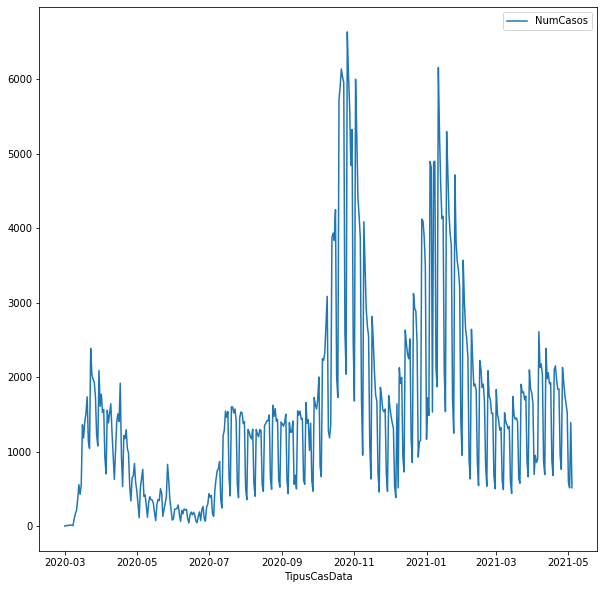

In [23]:
df_sorted = df.sort_values(by='TipusCasData') 
grouped = df_sorted.groupby([df['TipusCasData'].dt.date]).sum()
grouped.plot.line(figsize=(10,10))

Visualitzant el número de casos, s'aprecia una primera onada al març de 2020, seguida d'una altra sobre novembre de 2021 i la tercera sobre gener de 2021.

Per tal de fer un millor tractament de les dades a la visualització, gravarem un nou csv amb les dades agrupades per dia, rang d'edat i regió. A més, eliminarem les dades no necessàries, i canviarem el format de la data:

In [50]:
# eliminem les columnes necessaries
df_sorted = df.sort_values(by='TipusCasData') 

df_sorted = df_sorted.drop("RegioSanitariaCodi", axis=1)
df_sorted = df_sorted.drop("SexeCodi", axis=1)
df_sorted = df_sorted.drop("TipusCasDescripcio", axis=1)
df_sorted = df_sorted.drop("SexeDescripcio", axis=1)

# eliminem les files amb "No Classificat"
df_sorted = df_sorted[df_sorted.RegioSanitariaDescripcio != "No classificat"]
df_sorted = df_sorted[df_sorted.EdatRang != "No classificat"]

In [51]:
df_sorted['Total'] = df_sorted.groupby(["TipusCasData", "RegioSanitariaDescripcio", "EdatRang"])["NumCasos"].transform('sum')
df_unique = df_sorted.drop_duplicates(subset=["TipusCasData", "RegioSanitariaDescripcio", "EdatRang"])
df_unique = df_unique.drop("NumCasos", axis=1)
df_unique.head()

,TipusCasData,RegioSanitariaDescripcio,EdatRang,Total
108838,2020-03-01,BARCELONA CIUTAT,20-29,1
108835,2020-03-02,METROPOLITANA SUD,60-69,1
108834,2020-03-02,CATALUNYA CENTRAL,30-39,2
108832,2020-03-02,BARCELONA CIUTAT,30-39,1
108831,2020-03-02,BARCELONA CIUTAT,50-59,1


In [52]:
# gravem el csv final
df_unique.to_csv("./final_data.csv", header=T)